# The Sparks Foundation - GRIP - Data Science And Business Analytics - January 2022

# Task 2 :- Prediction Using Unsupervised ML

# Author : Akshay Ramteke

### Problem Statement: From the given 'Iris" dataset, predict the optimum number of clusters and represent it visually.

### Importing Libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb

### Loading the iris dataset

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()   # First 5 rows will be displayed

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.shape

(150, 4)

# Finding the optimum number of clusters

### Using K-means classification

In [4]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []    # wcss = within cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Plot

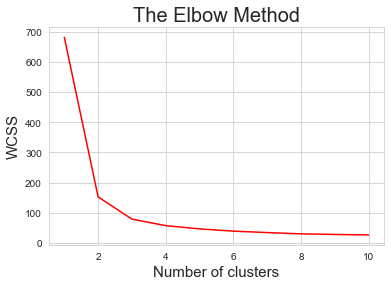

In [5]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
sb.set_style("whitegrid")
plt.plot(range(1,11), wcss,"r")
plt.title("The Elbow Method",{'size':20})
plt.xlabel("Number of clusters",{'size':15})
plt.ylabel("WCSS",{'size':15})
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 
This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

### From this we choose the number of clusters as ** '3**'.

In [7]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the Data

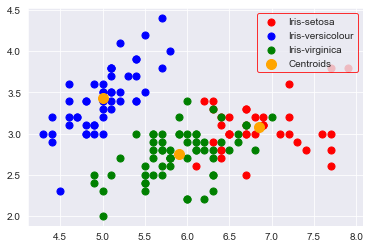

In [11]:
# Visualising the clusters - On the first two columns
sb.set_style("darkgrid")
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],s = 50,c = "red",label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],s = 50,c = "blue",label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],s = 50,c = "green",label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="orange",label="Centroids")

plt.legend(loc = "upper right",edgecolor="red")